In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
df_survived_sex=df.pivot_table("survived",index="sex",columns="embark_town",aggfunc=["mean","sum","std"])
df_survived_sex

mean                              sum                         \
embark_town Cherbourg Queenstown Southampton Cherbourg Queenstown Southampton   
sex                                                                             
female       0.876712   0.750000    0.689655        64         27         140   
male         0.305263   0.073171    0.174603        29          3          77   

                  std                         
embark_town Cherbourg Queenstown Southampton  
sex                                           
female       0.331042   0.439155    0.463778  
male         0.462962   0.263652    0.380058

In [17]:
df_percent=df_survived_sex.apply(lambda x: x / x.sum() * 100, axis=1)

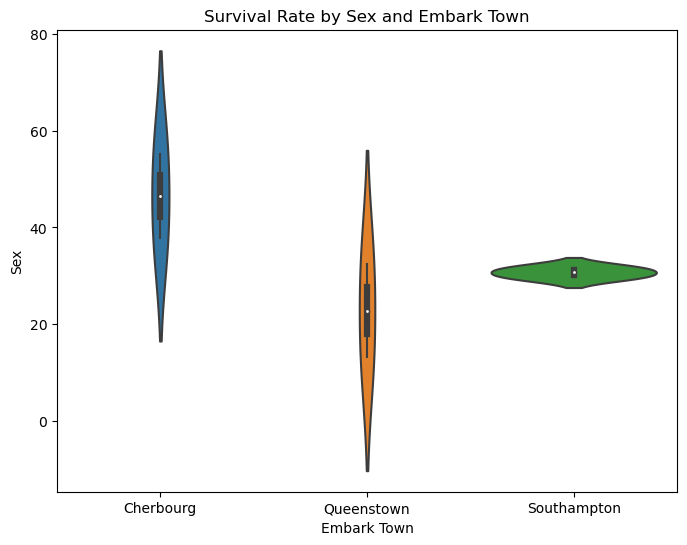

In [20]:
plt.figure(figsize=(8, 6))  # Figure boyutlarını belirleyelim
sns.violinplot(df_percent, annot=True, fmt=".2f", cmap="coolwarm")  # Isı haritasını çizelim
plt.title("Survival Rate by Sex and Embark Town")  # Başlık ekleyelim
plt.xlabel("Embark Town")  # X ekseni etiketi
plt.ylabel("Sex")  # Y ekseni etiketi
plt.show()  # Grafiği gösterelim